# Group Members:
## Dewansh Singh (037)
## Sakshi Dumbre (026)
## Anurag Taparia (068)
## Vedant Dawange (082)

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Step-1: Gathering Data

In [2]:
df=pd.read_csv("student2.csv")
df.head()

,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
0,13001,10001,Ora,Klein,OKlein,Christopher,Active,04-02-2000,2018.0,3,10,1
1,13002,10001,Beulah,McMillan,BMcMillan,Lynn,Inactive,11-12-1999,2018.0,7,7,0
2,13003,10001,Florence,Stark,FStark,Brian,Inactive,12/19/1997,2018.0,10,5,5
3,13004,10001,Noah,Gilbertson,NGilbertson,NaN,Active,6/20/2000,2018.0,2,8,1
4,13005,10001,Erna,Parker,EParker,Troy,Active,5/17/1998,2018.0,4,9,0


In [3]:
# let's preview the dataset

df.head(15)

,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
0,13001,10001,Ora,Klein,OKlein,Christopher,Active,04-02-2000,2018.0,3,10,1
1,13002,10001,Beulah,McMillan,BMcMillan,Lynn,Inactive,11-12-1999,2018.0,7,7,0
2,13003,10001,Florence,Stark,FStark,Brian,Inactive,12/19/1997,2018.0,10,5,5
3,13004,10001,Noah,Gilbertson,NGilbertson,NaN,Active,6/20/2000,2018.0,2,8,1
4,13005,10001,Erna,Parker,EParker,Troy,Active,5/17/1998,2018.0,4,9,0
5,13006,10001,Sherry,Santana,SSantana,Thomas,NaN,8/22/1999,2018.0,5,8,4
6,13007,10001,Ronald,Lees,RLees,Grace,Active,05-11-1998,2018.0,4,9,1
7,13008,10001,Latasha,Pratt,LPratt,Christopher,Inactive,8/13/1999,2018.0,9,5,3
8,13009,10001,Misty,Thomas,MThomas,Lynn,Active,07-06-2000,2018.0,4,8,0
9,13010,10001,Petra,Barlow,PBarlow,Francis,Active,3/19/1997,2018.0,2,9,1


In [4]:
# view dimensions of dataset

df.shape

(114, 12)

## Statistical Method

In [5]:
df.describe()

,SIS ID,School SIS ID,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
count,114.000000,114.000000,111.000000,114.000000,114.000000,114.000000
mean,13057.500000,10001.710526,2018.720721,5.701754,7.815789,2.280702
std,33.052988,0.827874,0.833079,2.977585,1.962326,1.747356
min,13001.000000,10001.000000,2018.000000,1.000000,2.000000,0.000000
25%,13029.250000,10001.000000,2018.000000,3.000000,7.000000,1.000000
50%,13057.500000,10001.000000,2018.000000,6.000000,8.000000,2.000000
75%,13085.750000,10002.000000,2019.000000,9.000000,9.000000,4.000000
max,13114.000000,10003.000000,2020.000000,10.000000,10.000000,5.000000


In [6]:
df.isnull().sum()

SIS ID                   0
School SIS ID            0
First Name               0
Last Name                0
Username                 0
Middle Name              6
Status                   2
Birthdate                3
Graduation Year          3
Quiz Duration(in min)    0
Grade                    0
Tab Switch Log           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SIS ID                 114 non-null    int64  
 1   School SIS ID          114 non-null    int64  
 2   First Name             114 non-null    object 
 3   Last Name              114 non-null    object 
 4   Username               114 non-null    object 
 5   Middle Name            108 non-null    object 
 6   Status                 112 non-null    object 
 7   Birthdate              111 non-null    object 
 8   Graduation Year        111 non-null    float64
 9   Quiz Duration(in min)  114 non-null    int64  
 10  Grade                  114 non-null    int64  
 11  Tab Switch Log         114 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 10.8+ KB


# Exploratory Data Analysis (EDA)
# Step-2: Data Preparation
## Data Cleaning

In [8]:
#invalid values
df.loc[(df['Status'] != 'Active') & (df['Status'] != 'Inactive')]

,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
5,13006,10001,Sherry,Santana,SSantana,Thomas,NaN,8/22/1999,2018.0,5,8,4
41,13042,10001,Blaine,Dulaney,BDulaney,Kris,NaN,7/27/2000,2018.0,6,8,2


In [9]:
df= df.drop([5])
df= df.drop([41])
df.reset_index()

,index,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
0,0,13001,10001,Ora,Klein,OKlein,Christopher,Active,04-02-2000,2018.0,3,10,1
1,1,13002,10001,Beulah,McMillan,BMcMillan,Lynn,Inactive,11-12-1999,2018.0,7,7,0
2,2,13003,10001,Florence,Stark,FStark,Brian,Inactive,12/19/1997,2018.0,10,5,5
3,3,13004,10001,Noah,Gilbertson,NGilbertson,NaN,Active,6/20/2000,2018.0,2,8,1
4,4,13005,10001,Erna,Parker,EParker,Troy,Active,5/17/1998,2018.0,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,109,13110,10003,Pallavi,Singh,PSingh,kumar,Active,19-05-2000,2020.0,2,8,0
108,110,13111,10003,Arya,kashyap,AKashyap,Pandit,Inactive,12-02-2001,2020.0,8,7,3
109,111,13112,10003,Anandi,Chopra,AChopra,Singh,Active,12-12-1999,2020.0,3,8,4
110,112,13113,10003,Aditya,Kapoor,AKapoor,Raj,Active,31-01-2001,2020.0,3,9,3


In [10]:
df['Graduation Year'].fillna((df['Graduation Year'].mean()), inplace=True)

In [11]:
df.isnull().sum()

SIS ID                   0
School SIS ID            0
First Name               0
Last Name                0
Username                 0
Middle Name              6
Status                   0
Birthdate                3
Graduation Year          0
Quiz Duration(in min)    0
Grade                    0
Tab Switch Log           0
dtype: int64

# Step-3: Data Wrangling

In [12]:
df.head(15)

,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
0,13001,10001,Ora,Klein,OKlein,Christopher,Active,04-02-2000,2018.000000,3,10,1
1,13002,10001,Beulah,McMillan,BMcMillan,Lynn,Inactive,11-12-1999,2018.000000,7,7,0
2,13003,10001,Florence,Stark,FStark,Brian,Inactive,12/19/1997,2018.000000,10,5,5
3,13004,10001,Noah,Gilbertson,NGilbertson,NaN,Active,6/20/2000,2018.000000,2,8,1
4,13005,10001,Erna,Parker,EParker,Troy,Active,5/17/1998,2018.000000,4,9,0
6,13007,10001,Ronald,Lees,RLees,Grace,Active,05-11-1998,2018.000000,4,9,1
7,13008,10001,Latasha,Pratt,LPratt,Christopher,Inactive,8/13/1999,2018.000000,9,5,3
8,13009,10001,Misty,Thomas,MThomas,Lynn,Active,07-06-2000,2018.000000,4,8,0
9,13010,10001,Petra,Barlow,PBarlow,Francis,Active,3/19/1997,2018.000000,2,9,1
10,13011,10001,Bonnie,Hampton,PHampton,Robert,Inactive,04-10-1998,2018.000000,7,8,4


In [13]:
df=pd.read_csv("student2.csv")


In [14]:
df.shape

(114, 12)

In [15]:
#invalid values
df.loc[(df['Status'] != 'Active') & (df['Status'] != 'Inactive')]

,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
5,13006,10001,Sherry,Santana,SSantana,Thomas,NaN,8/22/1999,2018.0,5,8,4
41,13042,10001,Blaine,Dulaney,BDulaney,Kris,NaN,7/27/2000,2018.0,6,8,2


In [16]:
df= df.drop([5])
df= df.drop([41])
df.reset_index()

,index,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
0,0,13001,10001,Ora,Klein,OKlein,Christopher,Active,04-02-2000,2018.0,3,10,1
1,1,13002,10001,Beulah,McMillan,BMcMillan,Lynn,Inactive,11-12-1999,2018.0,7,7,0
2,2,13003,10001,Florence,Stark,FStark,Brian,Inactive,12/19/1997,2018.0,10,5,5
3,3,13004,10001,Noah,Gilbertson,NGilbertson,NaN,Active,6/20/2000,2018.0,2,8,1
4,4,13005,10001,Erna,Parker,EParker,Troy,Active,5/17/1998,2018.0,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,109,13110,10003,Pallavi,Singh,PSingh,kumar,Active,19-05-2000,2020.0,2,8,0
108,110,13111,10003,Arya,kashyap,AKashyap,Pandit,Inactive,12-02-2001,2020.0,8,7,3
109,111,13112,10003,Anandi,Chopra,AChopra,Singh,Active,12-12-1999,2020.0,3,8,4
110,112,13113,10003,Aditya,Kapoor,AKapoor,Raj,Active,31-01-2001,2020.0,3,9,3


In [17]:
# view dimensions of dataset after droping the columns having invalid values

df.shape

(112, 12)

In [18]:
df = df.dropna()
df.head(15)

,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
0,13001,10001,Ora,Klein,OKlein,Christopher,Active,04-02-2000,2018.0,3,10,1
1,13002,10001,Beulah,McMillan,BMcMillan,Lynn,Inactive,11-12-1999,2018.0,7,7,0
2,13003,10001,Florence,Stark,FStark,Brian,Inactive,12/19/1997,2018.0,10,5,5
4,13005,10001,Erna,Parker,EParker,Troy,Active,5/17/1998,2018.0,4,9,0
6,13007,10001,Ronald,Lees,RLees,Grace,Active,05-11-1998,2018.0,4,9,1
7,13008,10001,Latasha,Pratt,LPratt,Christopher,Inactive,8/13/1999,2018.0,9,5,3
8,13009,10001,Misty,Thomas,MThomas,Lynn,Active,07-06-2000,2018.0,4,8,0
9,13010,10001,Petra,Barlow,PBarlow,Francis,Active,3/19/1997,2018.0,2,9,1
10,13011,10001,Bonnie,Hampton,PHampton,Robert,Inactive,04-10-1998,2018.0,7,8,4
12,13013,10001,Cesar,McCray,CMcCray,Wilma,Active,2/17/2001,2018.0,2,10,1


In [19]:
df.groupby('Status').mean()

,SIS ID,School SIS ID,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
Status,,,,,,
Active,13058.122449,10001.714286,2018.714286,2.816327,8.959184,2.142857
Inactive,13057.392157,10001.686275,2018.686275,8.392157,6.843137,2.372549


In [20]:
df.isnull().sum()

SIS ID                   0
School SIS ID            0
First Name               0
Last Name                0
Username                 0
Middle Name              0
Status                   0
Birthdate                0
Graduation Year          0
Quiz Duration(in min)    0
Grade                    0
Tab Switch Log           0
dtype: int64

In [21]:
df.Status.replace(('Active', 'Inactive'), (1, 0), inplace=True)
df.head(10)

,SIS ID,School SIS ID,First Name,Last Name,Username,Middle Name,Status,Birthdate,Graduation Year,Quiz Duration(in min),Grade,Tab Switch Log
0,13001,10001,Ora,Klein,OKlein,Christopher,1,04-02-2000,2018.0,3,10,1
1,13002,10001,Beulah,McMillan,BMcMillan,Lynn,0,11-12-1999,2018.0,7,7,0
2,13003,10001,Florence,Stark,FStark,Brian,0,12/19/1997,2018.0,10,5,5
4,13005,10001,Erna,Parker,EParker,Troy,1,5/17/1998,2018.0,4,9,0
6,13007,10001,Ronald,Lees,RLees,Grace,1,05-11-1998,2018.0,4,9,1
7,13008,10001,Latasha,Pratt,LPratt,Christopher,0,8/13/1999,2018.0,9,5,3
8,13009,10001,Misty,Thomas,MThomas,Lynn,1,07-06-2000,2018.0,4,8,0
9,13010,10001,Petra,Barlow,PBarlow,Francis,1,3/19/1997,2018.0,2,9,1
10,13011,10001,Bonnie,Hampton,PHampton,Robert,0,04-10-1998,2018.0,7,8,4
12,13013,10001,Cesar,McCray,CMcCray,Wilma,1,2/17/2001,2018.0,2,10,1


# Step-4: Analyse Data
## Data Visualization using several Graphical methods 

array([[<AxesSubplot:title={'center':'SIS ID'}>,
        <AxesSubplot:title={'center':'School SIS ID'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'Graduation Year'}>,
        <AxesSubplot:title={'center':'Quiz Duration(in min)'}>,
        <AxesSubplot:title={'center':'Grade'}>],
       [<AxesSubplot:title={'center':'Tab Switch Log'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

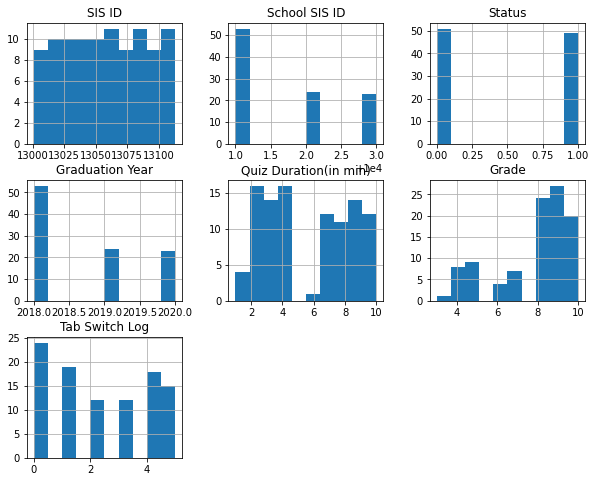

In [22]:
df.hist(figsize=(10,8))

<AxesSubplot:>

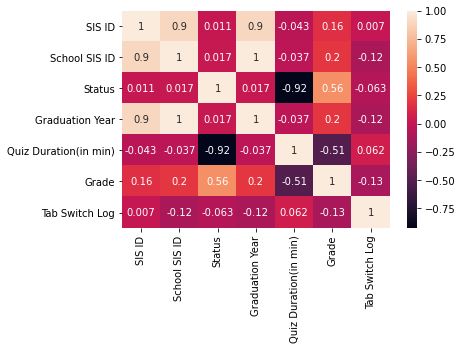

In [23]:
sns.heatmap(df.corr(),annot=True)

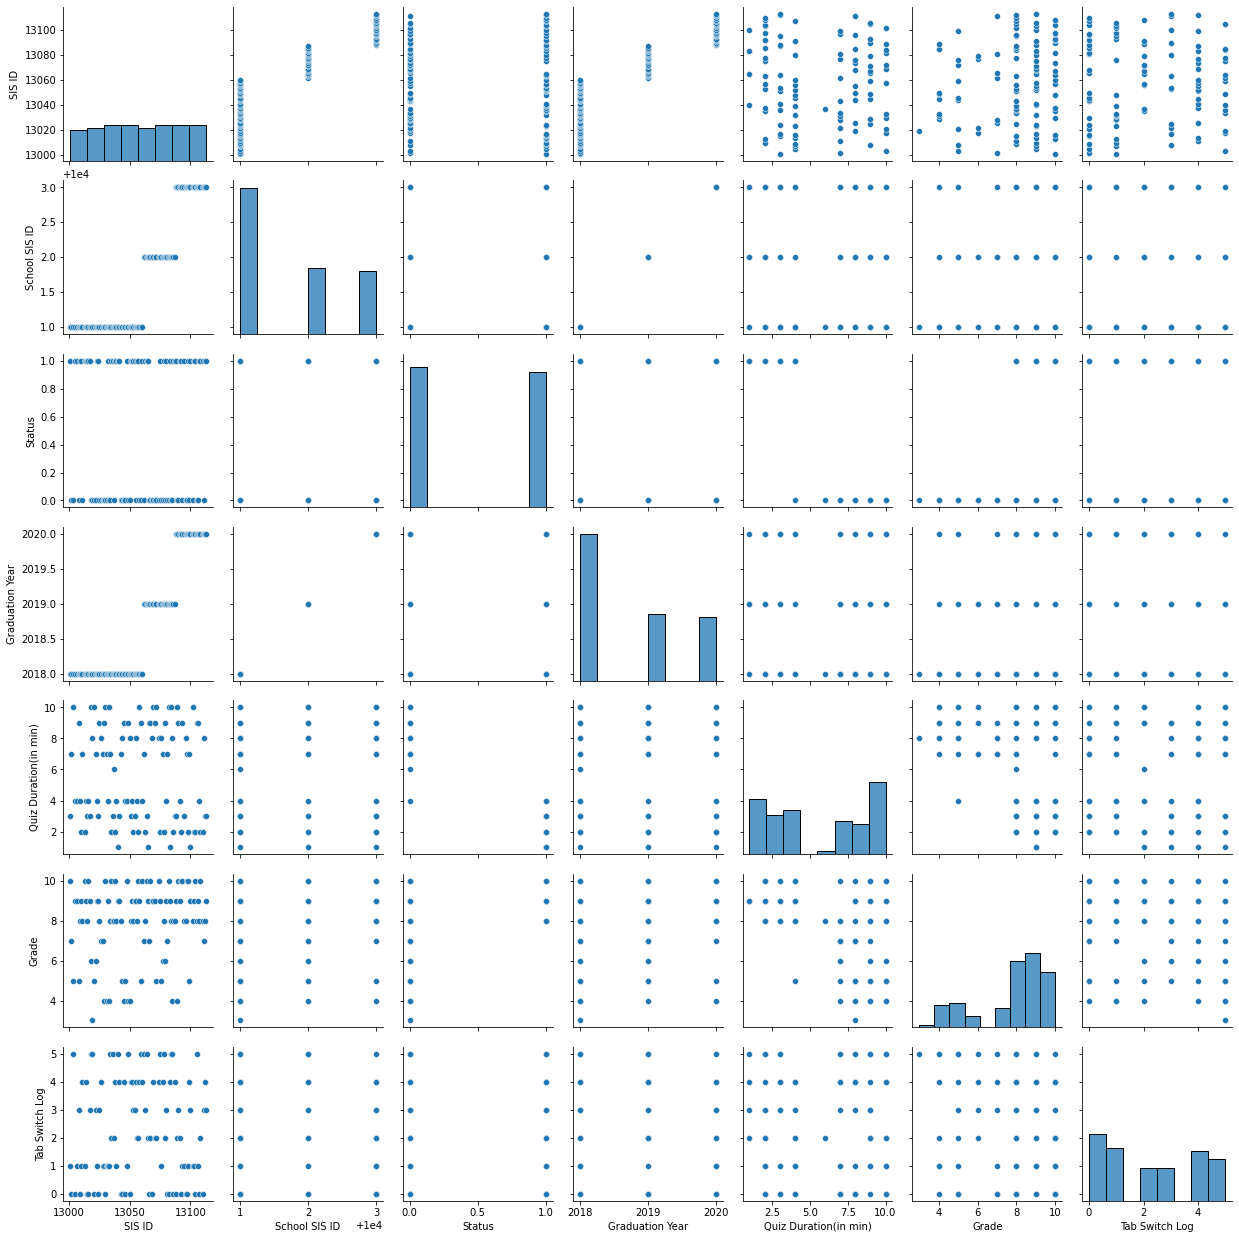

In [24]:
sns.pairplot(df, height=2.5)

<AxesSubplot:xlabel='Graduation Year', ylabel='Status'>

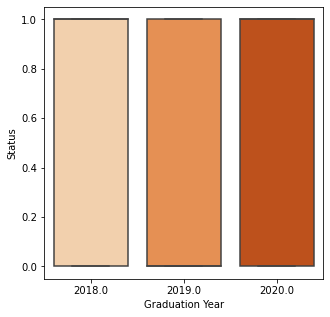

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(5, 5)
sns.boxplot(data=df,y="Status",x="Graduation Year", palette="Oranges")

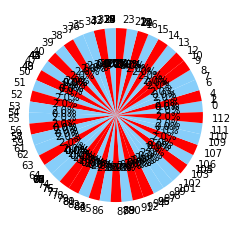

In [26]:
labels = df.index
colors = ['lightskyblue', 'red']
plt.pie(df['Status'], labels= labels, colors=colors, startangle=2, autopct='%.1f%%')
plt.show()

**Now, as we can observe there is no Outlier's available so now our dataset is fully cleaned. Ready to Train the model using this dataset.**

# Step-5: Train Model

In [28]:
col=['Quiz Duration(in min)','Grade','Tab Switch Log']
x=df[col]
y=df['Status']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [30]:
x_train.shape

(60, 3)

In [31]:
x_test.shape

(40, 3)

## Decision Tree

A decision tree is a **flowchart-like tree structure** where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.  It partitions the tree in a recursive manner called recursive partitioning. **This flowchart-like structure helps you in decision making**. It can be visualized like a flowchart diagram which easily mimics human level thinking. That is why decision trees are easy to understand and interpret.




Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.

$$Gini(D) = 1 - \sum_{i = 1}^{m} P_i^2 $$

### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [32]:
def feature_imp(model):
    importance = model.feature_importances_

    for i,v in enumerate(importance):
        imp[i]=v;
        print('Feature: %0d, Score: %.5f' % (i,imp[i]))

    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

In [33]:
from matplotlib import pyplot

clf_gini = DecisionTreeClassifier(criterion='gini',random_state=0)
clf_ginifit = clf_gini.fit(x_train,y_train)
y_pred_gini = clf_ginifit.predict(x_test)

feature_imp(clf_gini)

NameError: name 'imp' is not defined

### Compute precision, recall, F-measure and support

The _accuracy_ is the ratio *tp + tn = (tp + tn + fp + fn)*<br> 

The _precision_ is the ratio *tp / (tp + fp)* where *tp is the number of true positives* and *fp the number of false positives*. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.<br>

The _recall_ is the ratio *tp / (tp + fn)* where *tp is the number of true positives* and *fn the number of false negatives*. The recall is intuitively the ability of the classifier to find all the positive samples.<br>

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.<br>

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.<br>

*The support is the number of occurrences of each class in y_test.*

# Step - 6 Test Model

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))
print("Precision:",metrics.precision_score(y_test, y_pred_gini))
print("Recall:",metrics.recall_score(y_test, y_pred_gini))
print("F1 Score:",metrics.f1_score(y_test, y_pred_gini))

Accuracy: 0.975
Precision: 0.9545454545454546
Recall: 1.0
F1 Score: 0.9767441860465117


**Well, we got a classification rate of 96.66%, considered as best accuracy. So no need of improvement and this shows that the dataset we got is perfectly fine. No need of pruning is required. But we will still look for some pruning methods so that still we can improve our accuracy.**

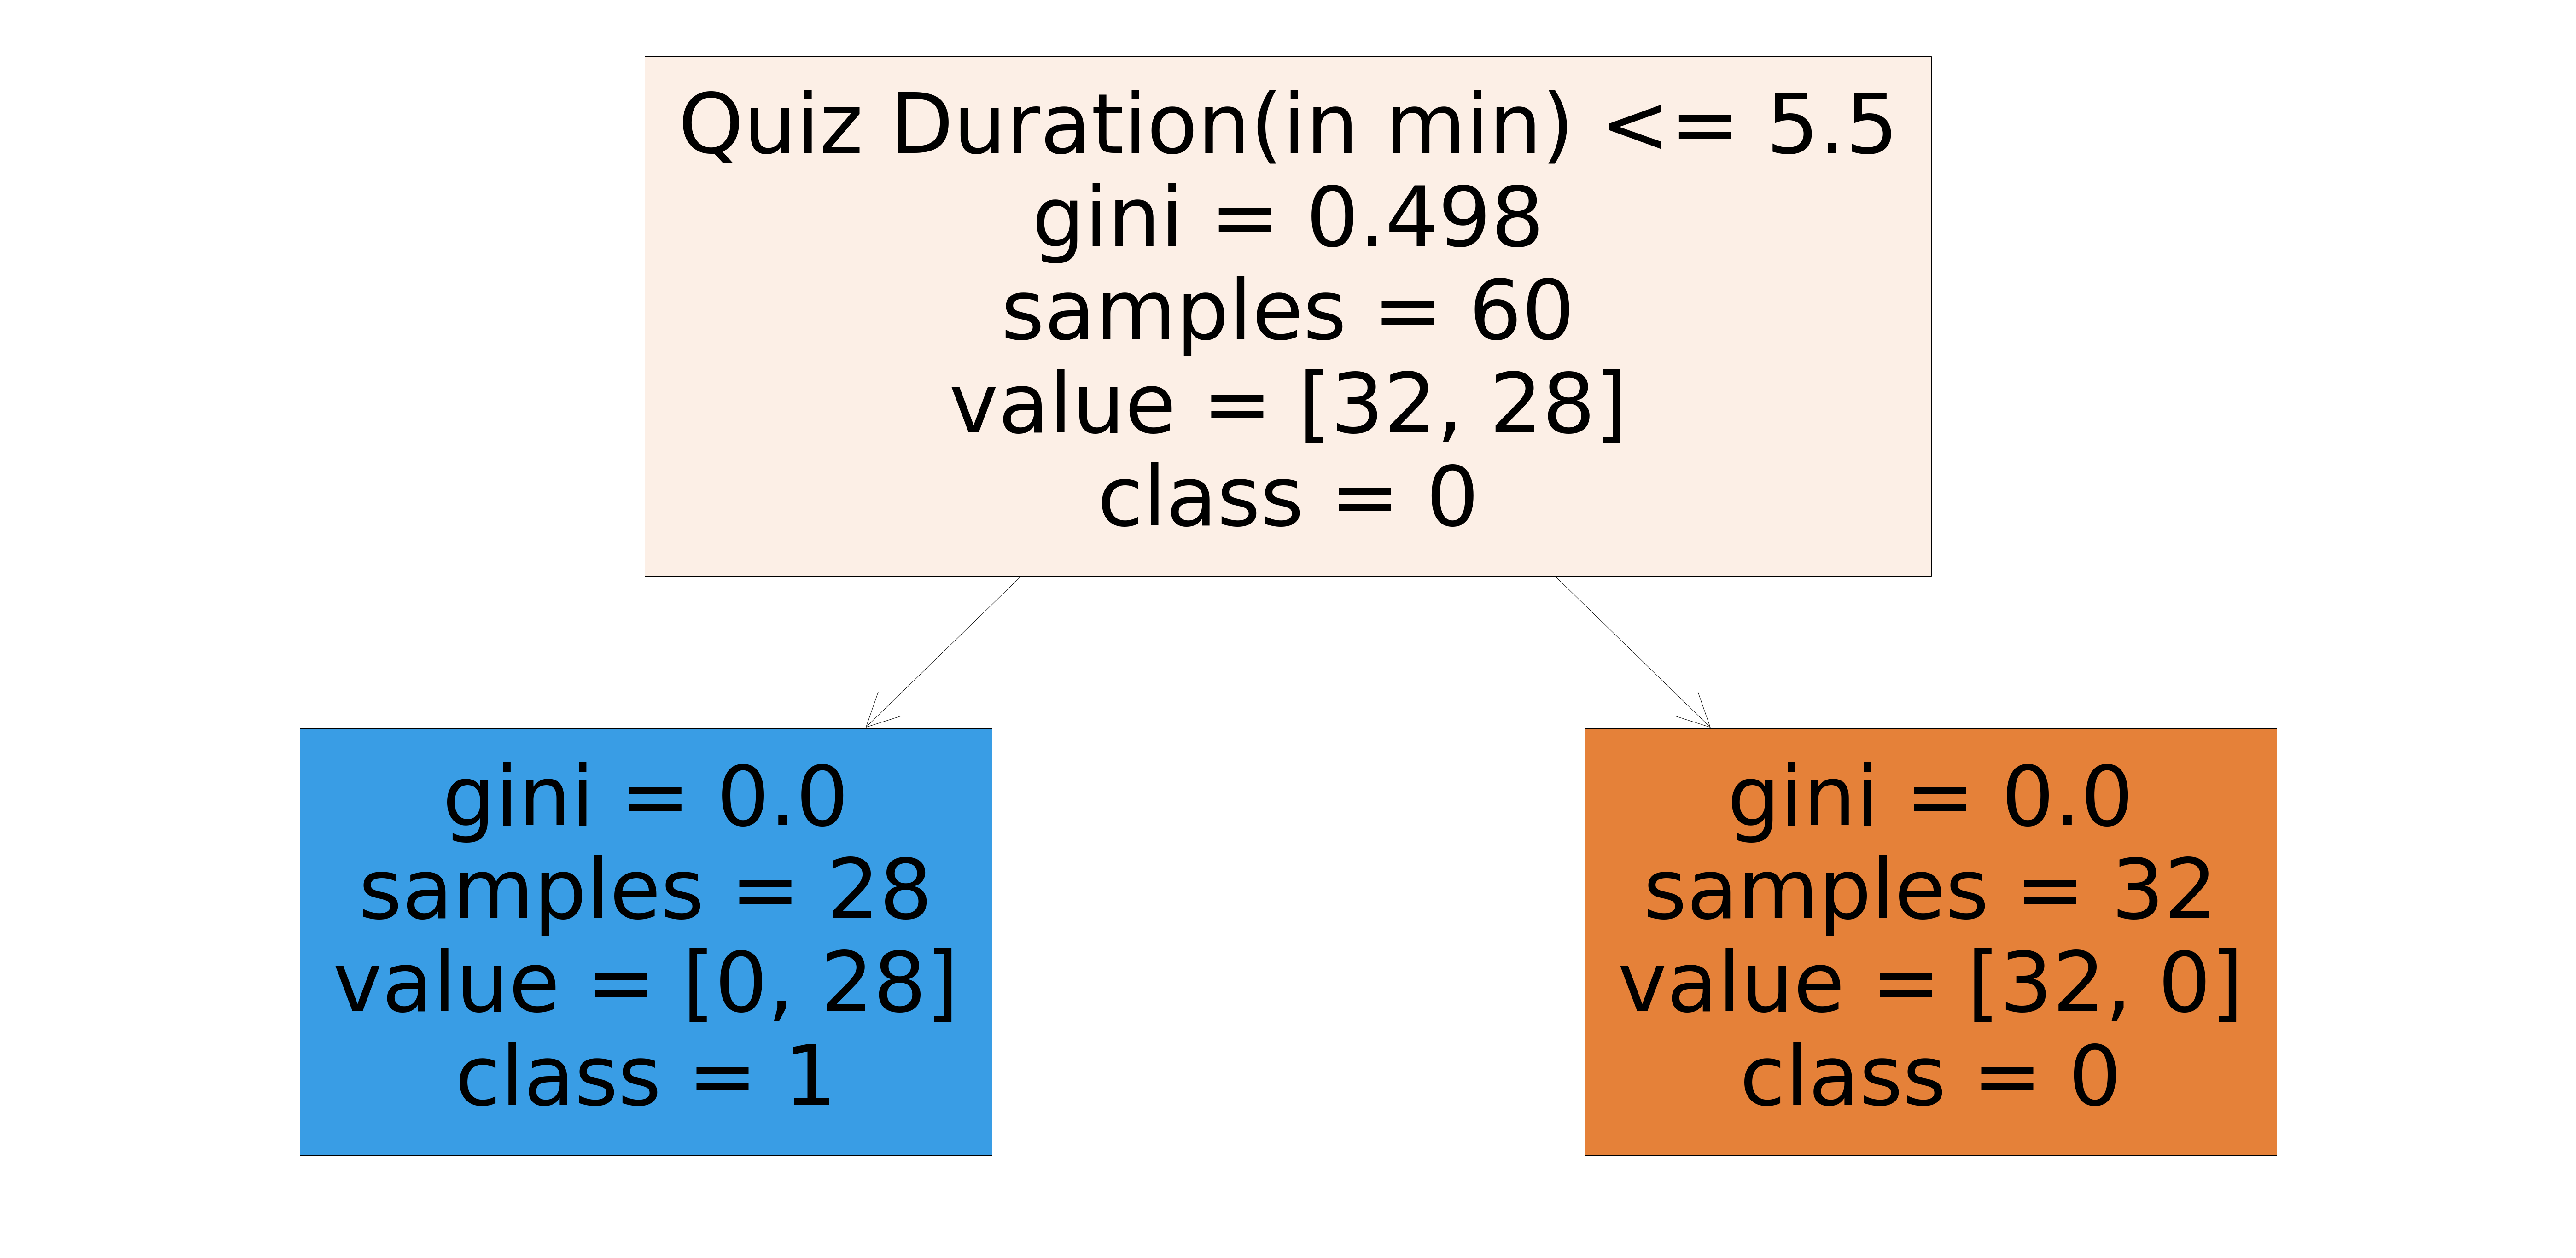

In [35]:
fig = plt.figure(figsize=(100,50))
DT_gini = tree.plot_tree(clf_gini, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)


## Optimizing Decision Tree Performance

- **criterion :  optional (default=”gini”) or Choose attribute selection measure**: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


- **splitter : string, optional (default=”best”) or Split Strategy**: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


- **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree**: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. 

### Gini

In [36]:
clf_gini4 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_fitgini4 = clf_gini4.fit(x_train,y_train)
y_pred_gini4 = clf_fitgini4.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini4))

Accuracy: 0.975


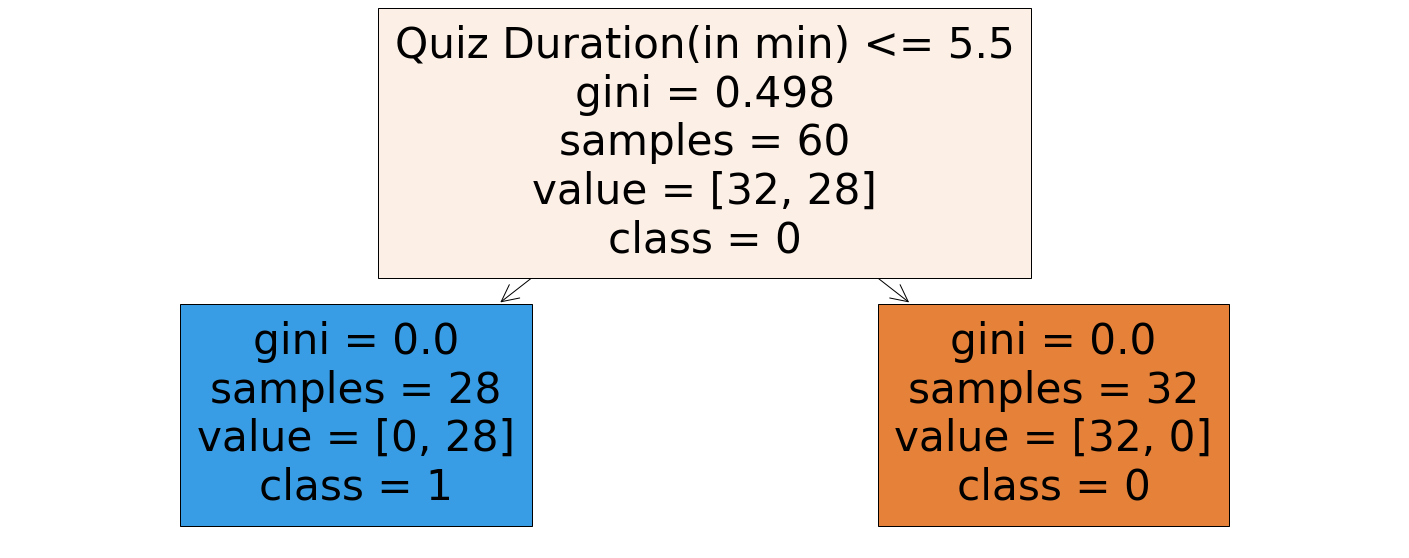

In [37]:
fig = plt.figure(figsize=(25,10))
DT_gini4 = tree.plot_tree(clf_gini4, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)

## Comparison of Decision Tree at different *max_depth*.

In [38]:
clf_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_fitgini3 = clf_gini3.fit(x_train,y_train)
y_pred_gini3 = clf_fitgini3.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini3))

Accuracy: 0.975


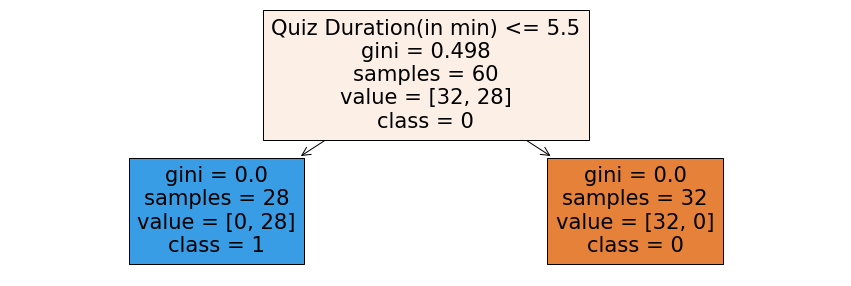

In [39]:
fig = plt.figure(figsize=(15,5))
DT_gini3 = tree.plot_tree(clf_gini3, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)

In [40]:
clf_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
clf_fitgini2 = clf_gini2.fit(x_train,y_train)
y_pred_gini2 = clf_fitgini2.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini2))

Accuracy: 0.975


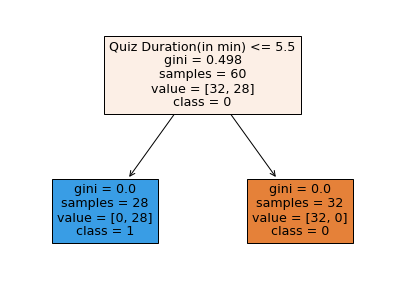

In [41]:
fig = plt.figure(figsize=(7,5))
DT_gini2 = tree.plot_tree(clf_gini2, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)

## Entropy

We can plot a decision tree on the same data with max_depth=3.  Other than pre-pruning parameters like Gini used initially, now we can also try other attribute selection measure such as <b>entropy</b>.


In [42]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf_entropyfit = clf_entropy.fit(x_train,y_train)
y_pred_entropy = clf_entropyfit.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))
print("Precision:",metrics.precision_score(y_test, y_pred_entropy))
print("Recall:",metrics.recall_score(y_test, y_pred_entropy))
print("F1 Score:",metrics.f1_score(y_test, y_pred_entropy))

Accuracy: 0.975
Precision: 0.9545454545454546
Recall: 1.0
F1 Score: 0.9767441860465117


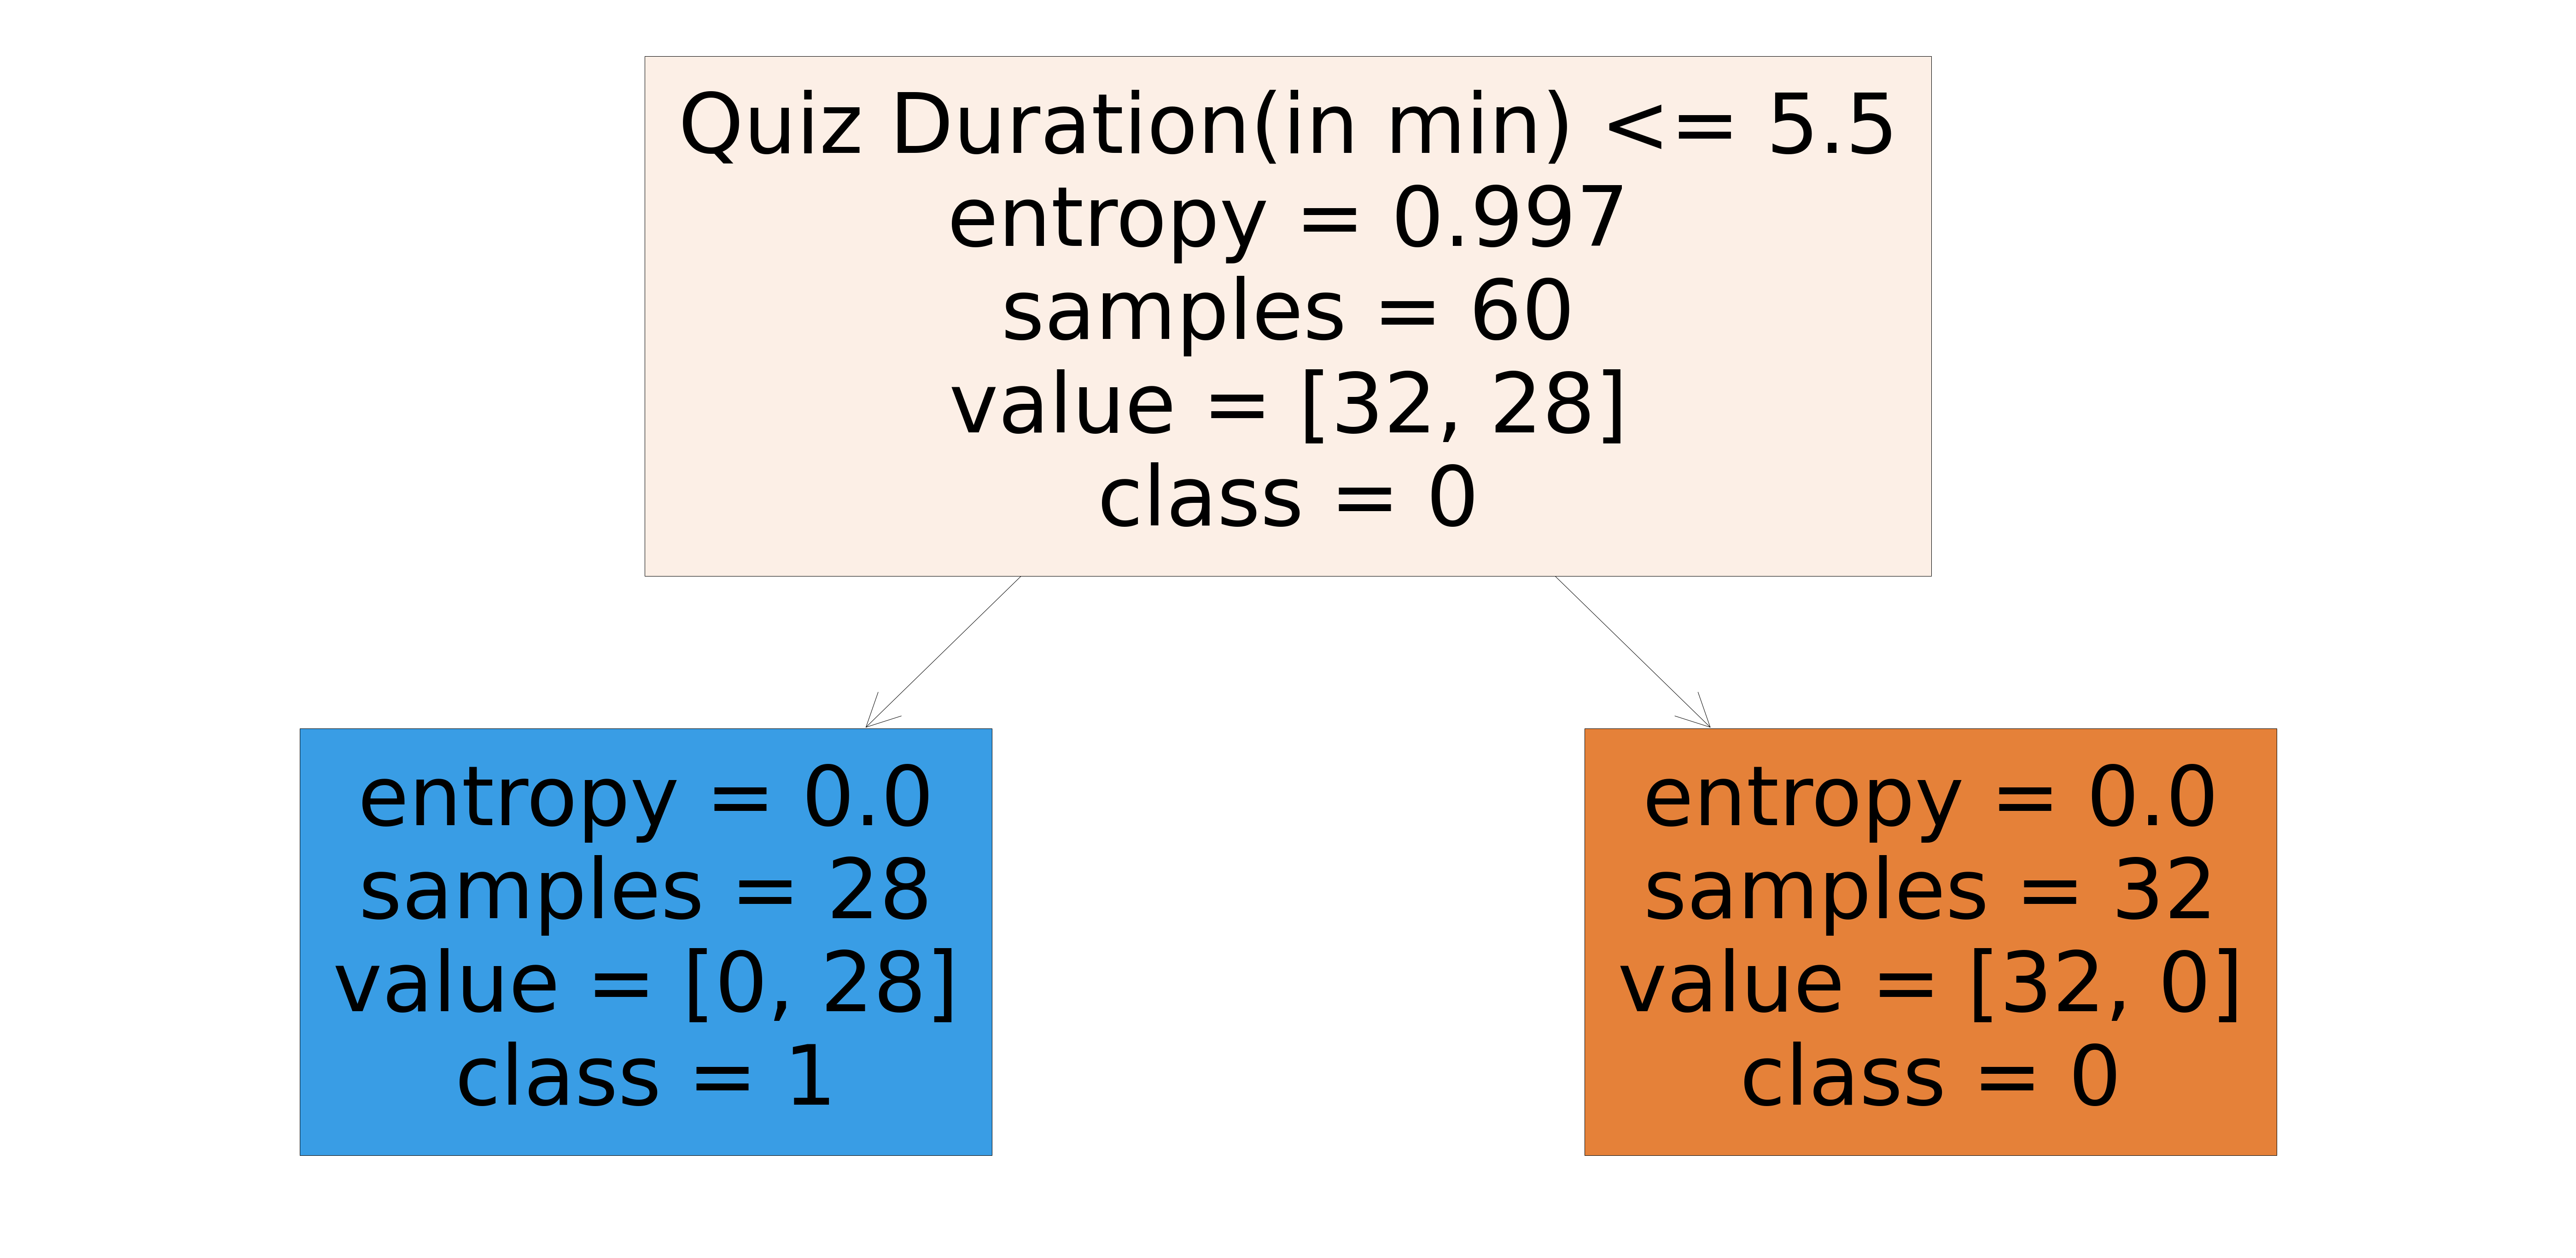

In [43]:
fig = plt.figure(figsize=(100,50))
DT_entropy = tree.plot_tree(clf_entropy, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)

In [44]:
clf_entropy4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_fitentropy4 = clf_entropy4.fit(x_train,y_train)
y_pred_entropy4 = clf_fitentropy4.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy4))

Accuracy: 0.975


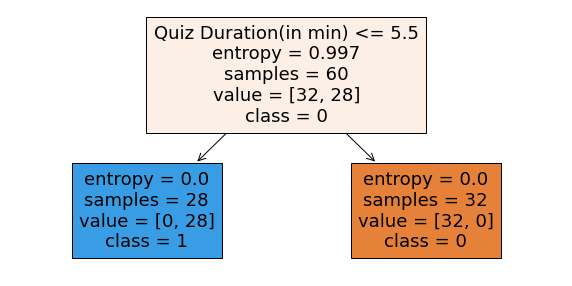

In [114]:
fig = plt.figure(figsize=(10,5))
DT_entropy4 = tree.plot_tree(clf_entropy4, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)

In [115]:
clf_entropy3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_fitentropy3 = clf_entropy3.fit(x_train,y_train)
y_pred_entropy3 = clf_fitentropy3.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy3))

Accuracy: 0.975


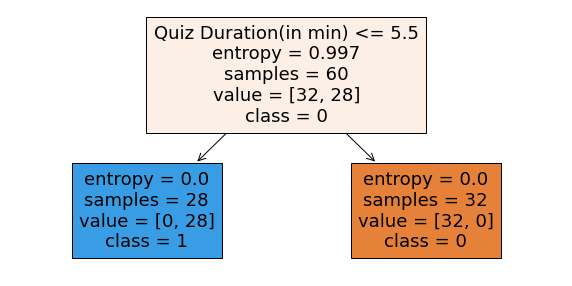

In [116]:
fig = plt.figure(figsize=(10,5))
DT_entropy3 = tree.plot_tree(clf_entropy3, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)

In [117]:
clf_entropy2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf_fitentropy2 = clf_entropy2.fit(x_train,y_train)
y_pred_entropy2 = clf_fitentropy2.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy2))

Accuracy: 0.975


**As we can observe that with all possible criteria we have tried the possibilities of improving the accuracy but we are getting same accuracy this shows that without pruning we can get the best accuracy and this concludes that our dataset is perfectly refined**

Measure and test error to measure how many mistakes this tree has made on test data respectively.

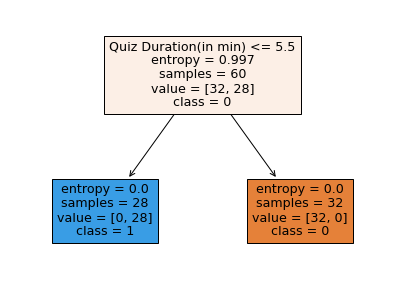

In [118]:
fig = plt.figure(figsize=(7,5))
DT_entropy2 = tree.plot_tree(clf_entropy2, 
                   feature_names=col,  
                   class_names=['0','1'],
                   filled=True)

### % of Error made by model

In [119]:
from sklearn.metrics import mean_squared_error
test_error = mean_squared_error(y_test,y_pred_gini)
print(test_error)

0.025


**Hence, our model is giving 96% accuracy for the collected dataset and we can conclude that with 96% of accuracy our model best fit ofr this algorithm and the attentiveness and activeness can be concluded with this model**

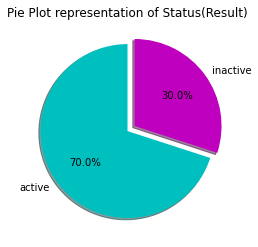

In [45]:
import matplotlib.pyplot as plt

 
active = [1]
inactive = [0]
slices = [70,30]
activities = ['active','inactive']
cols = ['c','m']
 
plt.pie(slices,
  labels=activities,
  colors=cols,
  startangle=90,
  shadow= True,
  explode=(0,0.1),
  autopct='%1.1f%%')
 
plt.title('Pie Plot representation of Status(Result)')
plt.show()